In [1]:
from neuralprophet import NeuralProphet
import pandas as pd

df = pd.read_csv("../Datasets/compare_prophet.csv")

2023-02-09 16:53:39.386996: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 16:53:39.387025: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#df['ds']

In [3]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")

from utils.read_dataset import ReadDatasets
import numpy as np

dir_data = '../Datasets/sintetic_data/test_compressor_data.h5'

y_periodic = np.array(ReadDatasets.read_h5(dir_data))
y_periodic = np.concatenate([y_periodic, y_periodic, y_periodic])
#print(y_periodic.shape)
#raise()
x_time = pd.date_range("2018-01-01", periods=len(y_periodic),freq="H")

df = pd.DataFrame({'ds':x_time, 'y':y_periodic})

In [4]:
m = NeuralProphet()

metrics = m.fit(df)

WARN - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.985% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 114
WARN - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (207) is too small than the required number for the learning rate finder (245). The results might not be optimal.


Finding best initial lr:   0%|          | 0/245 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [5]:
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.985% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.985% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 207it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [6]:
forecast

,ds,y,yhat1,trend,season_weekly,season_daily
0,2018-01-01 00:00:00,1.883151,43.591473,43.164772,0.435811,-0.009111
1,2018-01-01 01:00:00,-1.347759,43.536556,43.204037,0.399914,-0.067390
2,2018-01-01 02:00:00,-1.270485,43.601673,43.243301,0.362814,-0.004443
3,2018-01-01 03:00:00,0.969397,43.677868,43.282566,0.324559,0.070743
4,2018-01-01 04:00:00,-1.173123,43.655216,43.321835,0.285189,0.048195
...,...,...,...,...,...,...
6610,2018-10-03 10:00:00,3.738355,65.165855,66.268814,-0.908289,-0.194668
6611,2018-10-03 11:00:00,2.817755,65.230240,66.274117,-0.840966,-0.202908
6612,2018-10-03 12:00:00,1.797103,65.261894,66.279434,-0.770619,-0.246925
6613,2018-10-03 13:00:00,0.890117,65.444008,66.284737,-0.697632,-0.143097


WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARN - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


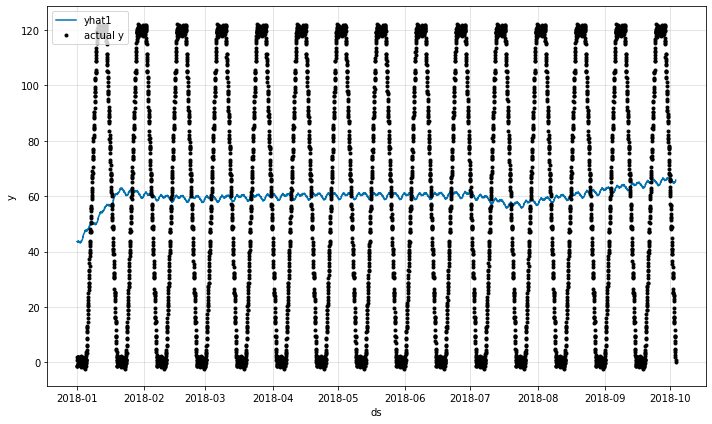

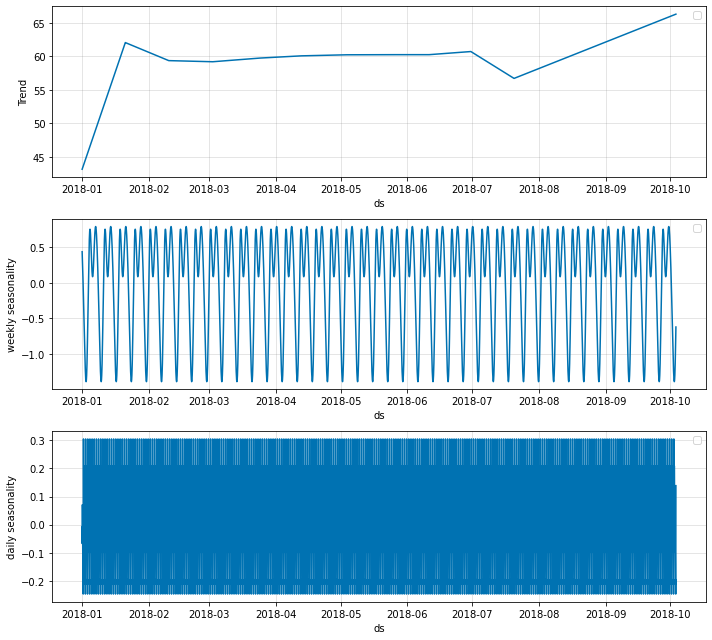

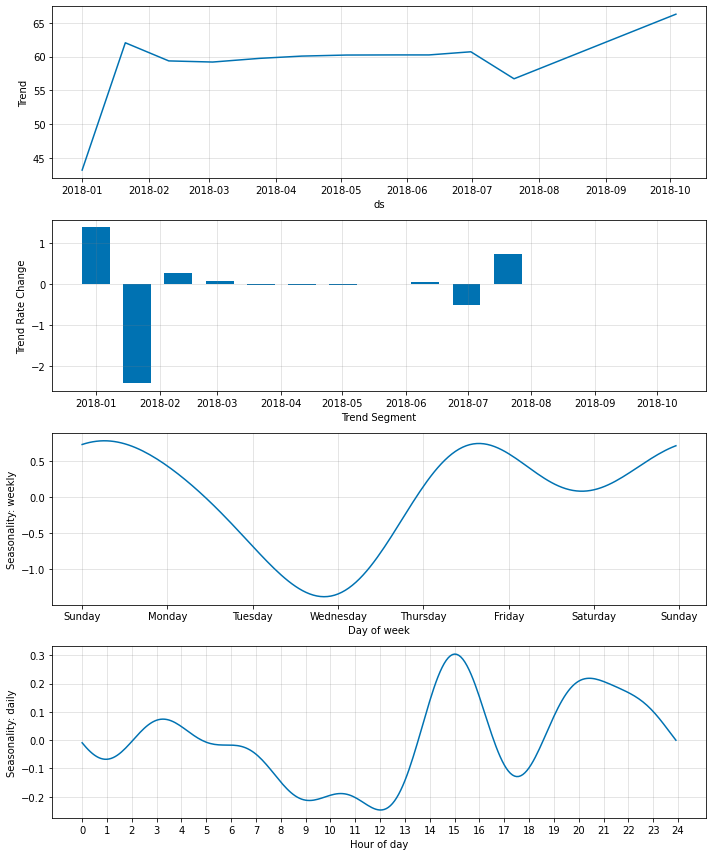

In [7]:
#m.set_plotting_backend('plotly')
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()